In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt



plt.rcParams['figure.dpi'] = 300
%matplotlib inline


In [13]:
bg = cv2.imread('car_segments/segment_with_car3.png')
# bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)

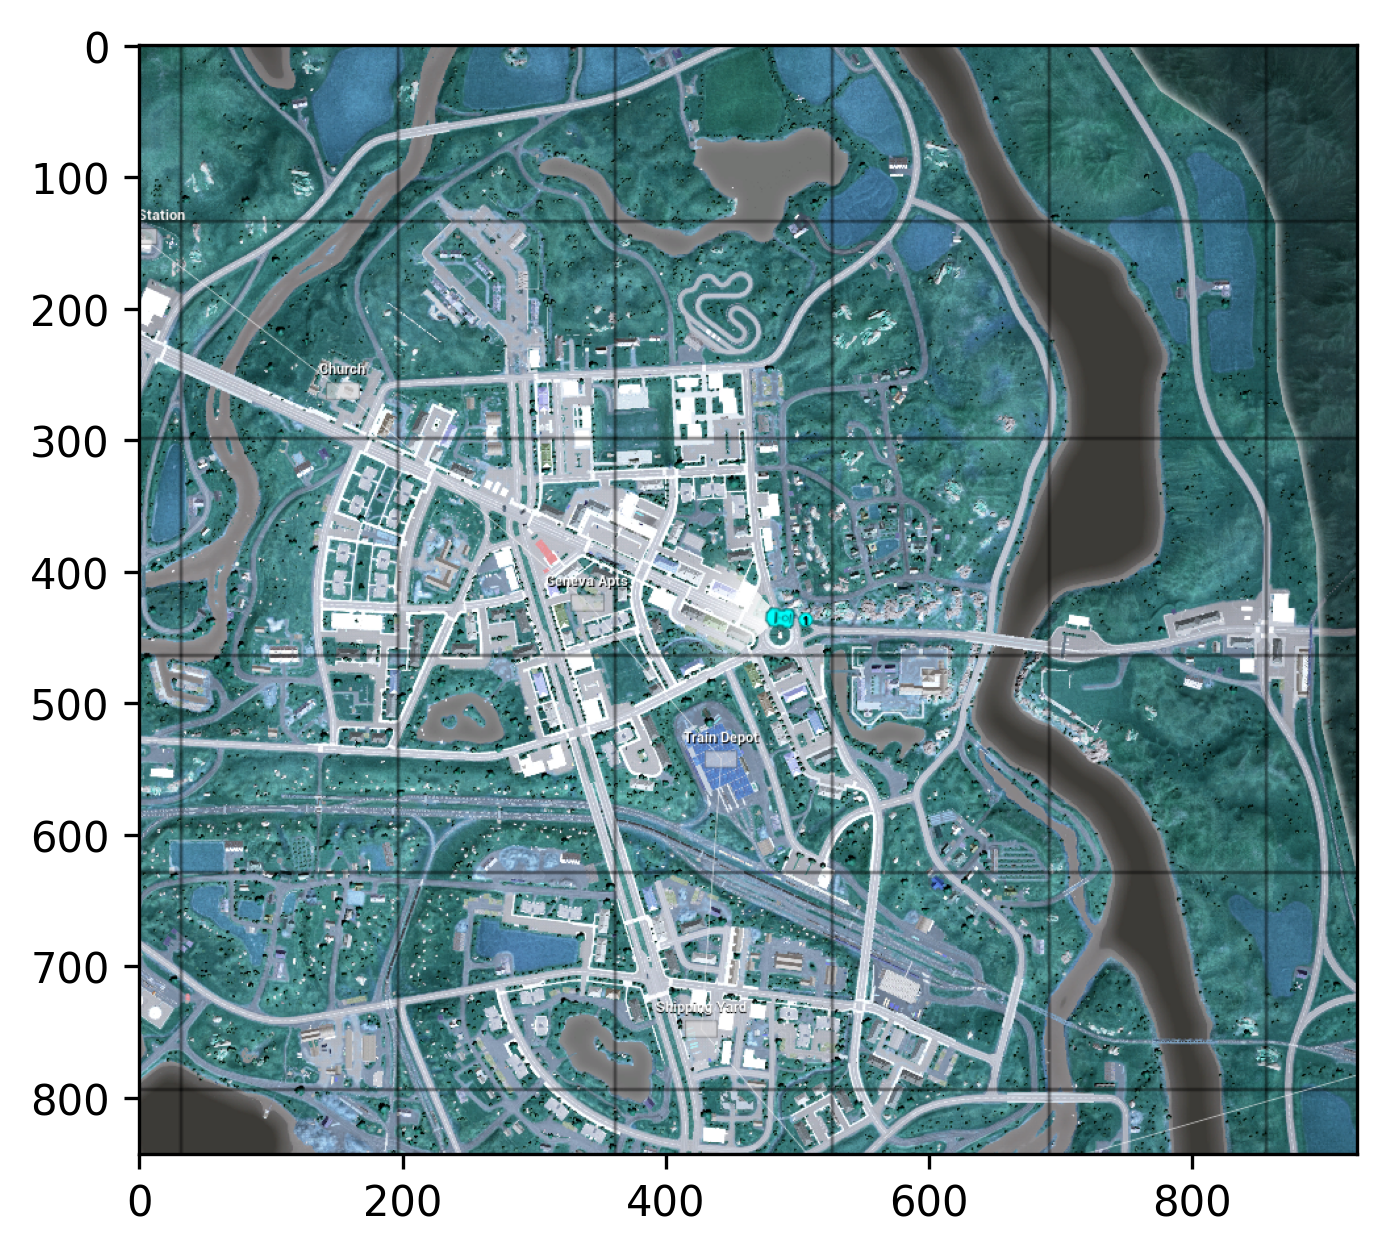

In [14]:
plt.imshow(bg)

In [15]:
bg.shape

(843, 926, 3)

In [16]:
sub = cv2.imread('car/car_masked.png')
sub = cv2.cvtColor(sub, cv2.COLOR_BGR2RGB)
height, width, channels = sub.shape

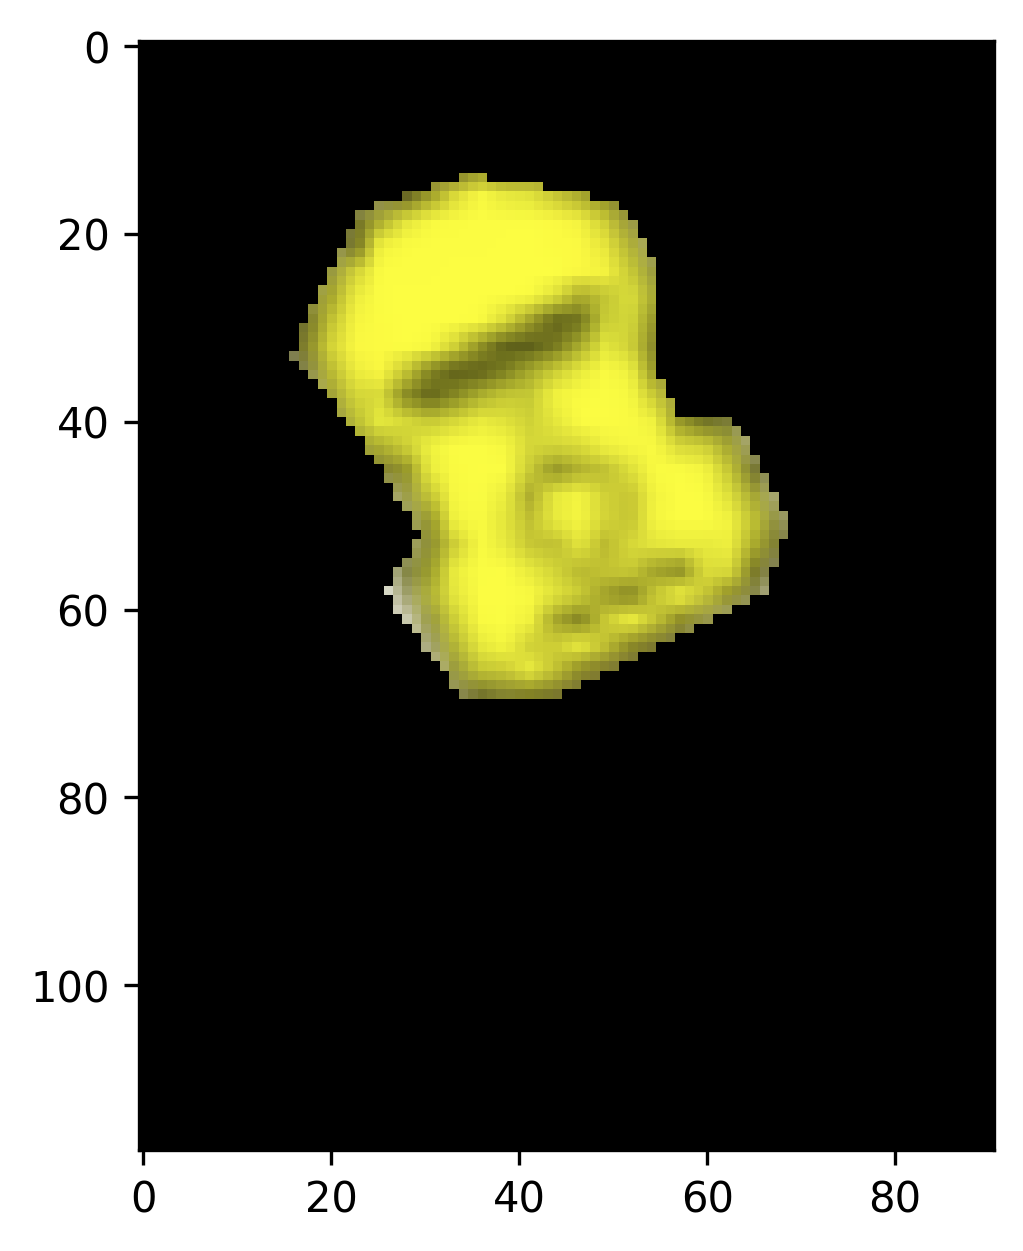

In [17]:
plt.imshow(sub)

In [18]:
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
# for m in methods:
#     bg_copy = bg.copy()
#     method = eval(m)
#     result = cv2.matchTemplate(bg_copy, sub, method)
#
#     min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
#     if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
#         top_left = min_loc
#     else:
#         top_left = max_loc
#
#     bottom_right = (top_left[0] + width, top_left[1] + height)
#     cv2.rectangle(bg_copy, top_left, bottom_right, 255, 10)
#     plt.subplot(121)
#
#     plt.subplot(122)
#     plt.imshow(bg_copy)
#     plt.title('Match Point')
#     plt.suptitle(m)
#     plt.show()

3 yellow regions found


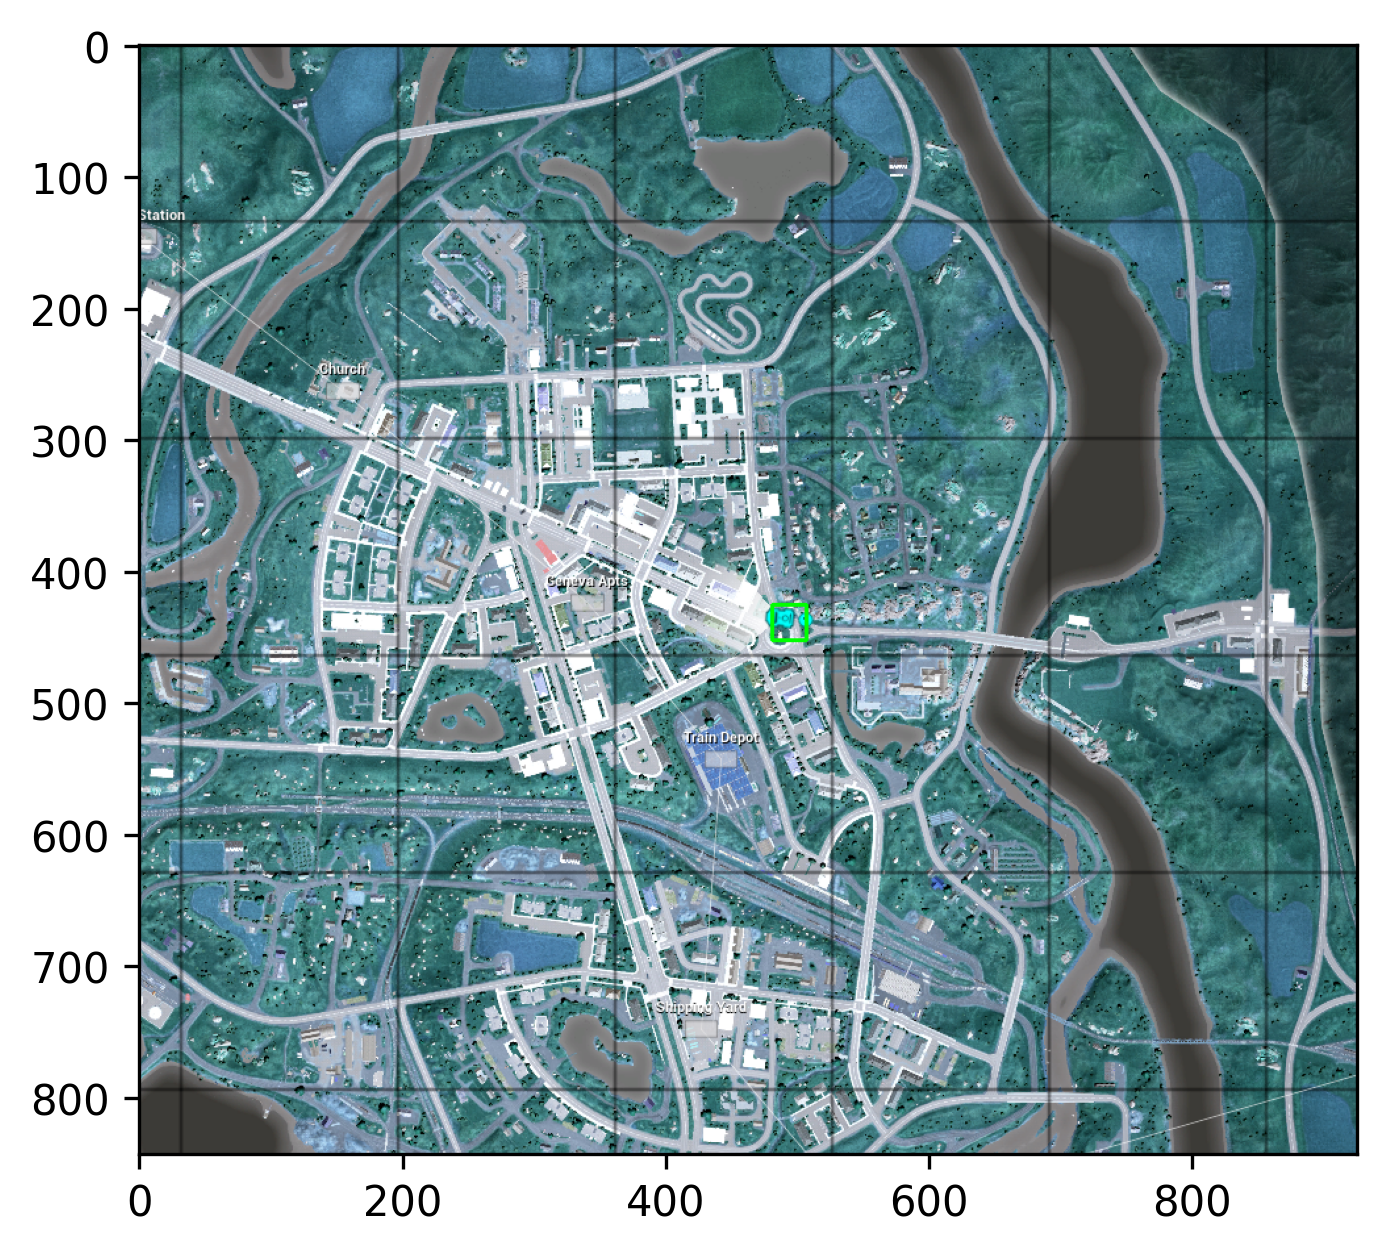

(<matplotlib.image.AxesImage at 0x7f20a768ab10>, None)

In [21]:
# find yellow pixels in bg

bg_cp = bg.copy()
hsv_image = cv2.cvtColor(bg, cv2.COLOR_BGR2HSV)

# define range of yellow color in HSV
# lower_yellow = np.array([58, 98, 97])
# upper_yellow = np.array([62, 102, 102])
lower_yellow = np.array([30, 160, 170])
upper_yellow = np.array([30, 255, 255])

# Create a mask using the thresholds
mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Apply the mask to the original image
yellow_pixels = cv2.bitwise_and(bg_cp, bg_cp, mask=mask)


# Find contours of the yellow regions
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"{len(contours)} yellow regions found")
# Find the largest contour
largest_contour = max(contours, key=cv2.contourArea)

# Draw a rectangle around the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)
cv2.rectangle(bg_cp, (x - 5, y - 5), (x + w + 10, y + h + 10), (0, 255, 0), 2)

center = (x + w // 2, y + h // 2)

plt.imshow(bg_cp), plt.show()

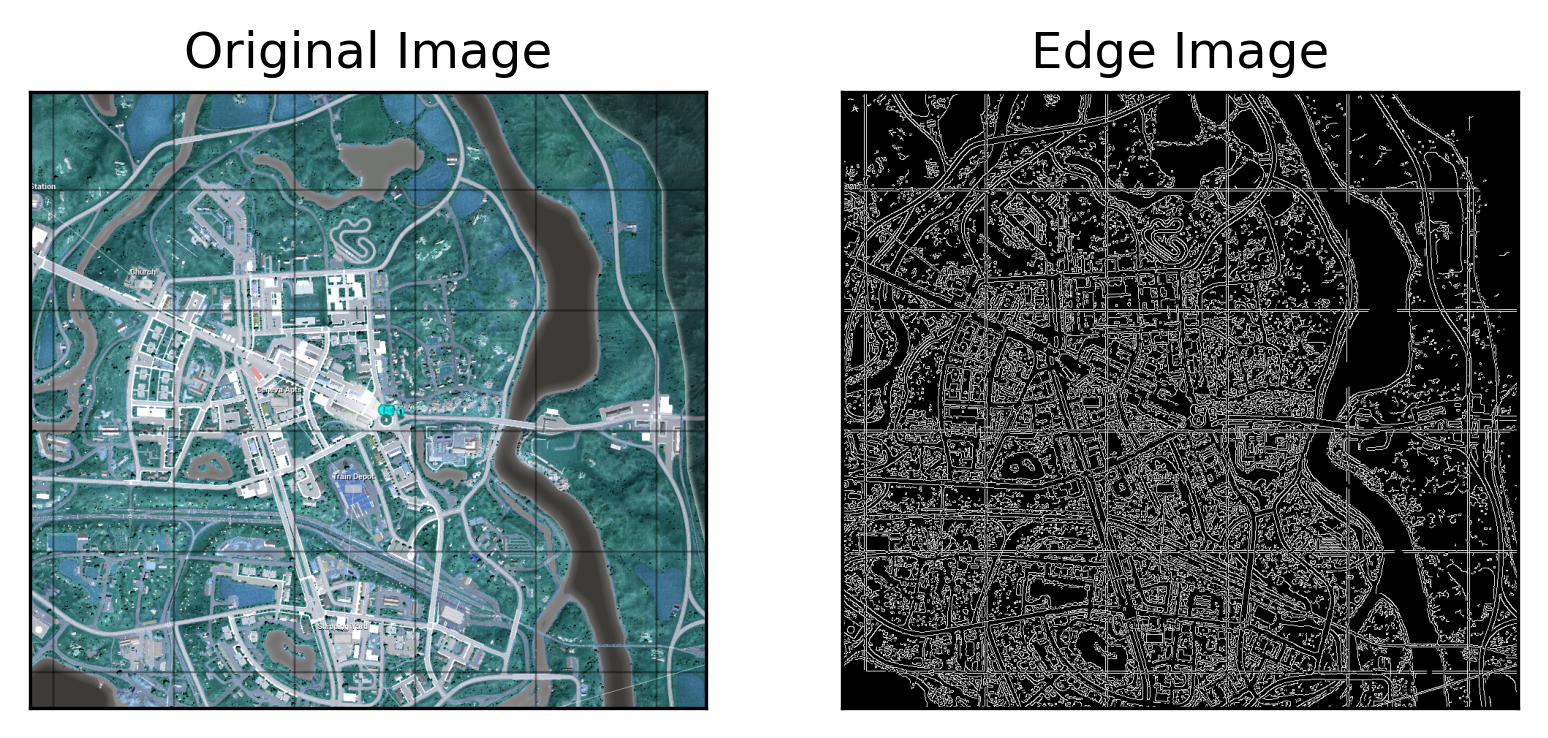

In [20]:
edges = cv2.Canny(bg,100,200)
plt.subplot(121),plt.imshow(bg,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
